In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
data= pd.read_csv("heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [173]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [174]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


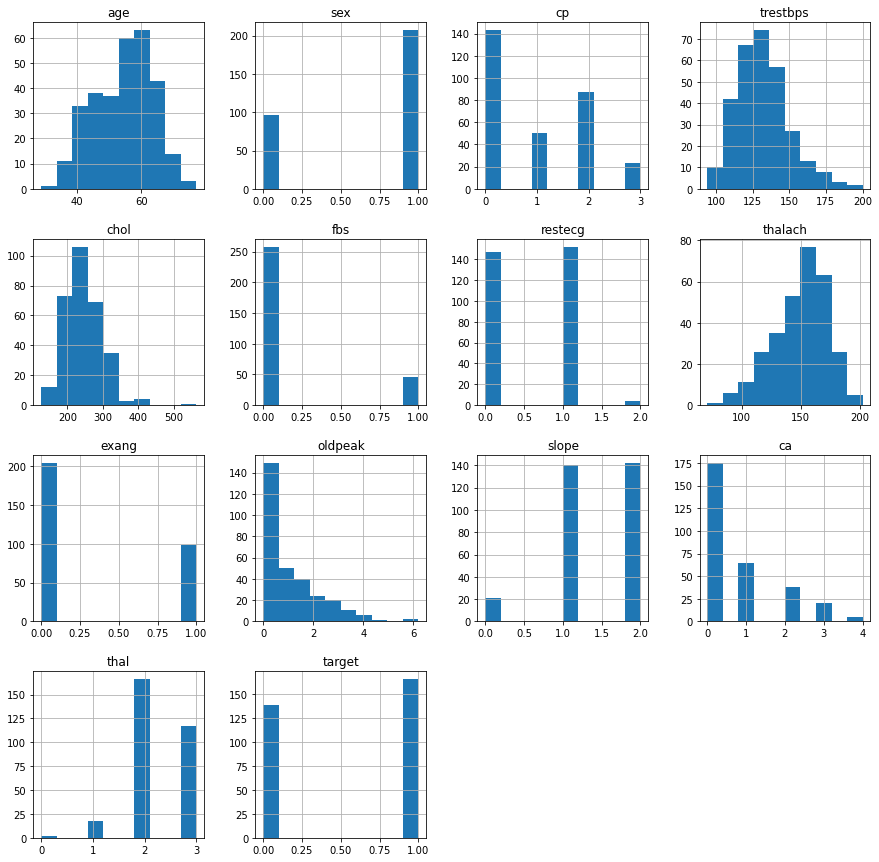

In [175]:
df = data.hist(figsize = (15,15))

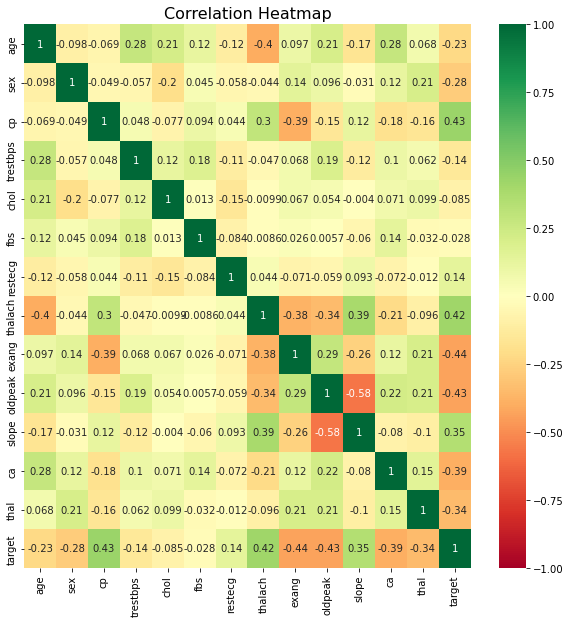

In [176]:
#plot the correlation map of the dataset  
plt.figure(figsize=(10,10))
corr = data.corr()
corr.index = data.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X= data.drop("target", axis=1)

y= data.target

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=444)

**IMPORTING MODELS**

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

models_scores = [] 

# **Combine multiple models of similar type**


**Bagging (Bootstrap aggregation)**

**Boosting**

In [179]:
dec= DecisionTreeClassifier()
dec.fit(x_train, y_train)


dec_pred= dec.predict(x_test)
score= accuracy_score(dec_pred, y_test)
print(score)
print("The accuracy for the training set is ", dec.score(x_train, y_train))
print("The accuracy for the test set is ", dec.score(x_test, y_test))
print("\n")


ref= RandomForestClassifier()
ref.fit(x_train, y_train)


ref_pred= ref.predict(x_test)
score= accuracy_score(ref_pred, y_test)
print(score)
print("The accuracy for the training set is ", ref.score(x_train, y_train))
print("The accuracy for the test set is ", ref.score(x_test, y_test))


0.819672131147541
The accuracy for the training set is  1.0
The accuracy for the test set is  0.819672131147541


0.8360655737704918
The accuracy for the training set is  1.0
The accuracy for the test set is  0.8360655737704918


  **BAGGING**

In [180]:
bag_dec= BaggingClassifier(base_estimator=dec)
bag_dec.fit(x_train, y_train)

bag_dec_pred= bag_dec.predict(x_test)
score= accuracy_score(bag_dec_pred, y_test)
print(score*100)
print("The accuracy for the training set is ", bag_dec.score(x_train, y_train))
print("The accuracy for the test set is ", bag_dec.score(x_test, y_test))
print("\n")
models_scores.append(['bagging decision tree', score])


bag_ref= BaggingClassifier(base_estimator=ref)
bag_ref.fit(x_train, y_train)

bag_ref_pred= bag_ref.predict(x_test)
score= accuracy_score(bag_ref_pred, y_test)
print(score*100)
print("The accuracy for the training set is ", bag_ref.score(x_train, y_train))
print("The accuracy for the test set is ", bag_ref.score(x_test, y_test))
models_scores.append(['bagging random forest', score])

83.60655737704919
The accuracy for the training set is  0.987603305785124
The accuracy for the test set is  0.8360655737704918


85.24590163934425
The accuracy for the training set is  0.9793388429752066
The accuracy for the test set is  0.8524590163934426


**BOOSTING**

In [181]:
#boosting
ada_dec= AdaBoostClassifier(base_estimator=dec)
ada_dec.fit(x_train, y_train)

ada_dec_pred= ada_dec.predict(x_test)
score= accuracy_score(ada_dec_pred, y_test)
print(score*100)
print("The accuracy for the training set is ", ada_dec.score(x_train, y_train))
print("The accuracy for the test set is ", ada_dec.score(x_test, y_test))
print("\n")
models_scores.append(['boosting adaboost decision tree', score])


ada_ref= AdaBoostClassifier(base_estimator=ref)
ada_ref.fit(x_train, y_train)

ada_ref_pred= ada_ref.predict(x_test)
score= accuracy_score(ada_ref_pred, y_test)
print(score*100)
print("The accuracy for the training set is ", ada_ref.score(x_train, y_train))
print("The accuracy for the test set is ", ada_ref.score(x_test, y_test))
models_scores.append(['boosting adaboost random forest', score])

80.32786885245902
The accuracy for the training set is  1.0
The accuracy for the test set is  0.8032786885245902


83.60655737704919
The accuracy for the training set is  1.0
The accuracy for the test set is  0.8360655737704918


In [182]:
xgb_dec= XGBClassifier(base_estimator=dec, eval_metric="logloss", use_label_encoder=False)
xgb_dec.fit(x_train, y_train)

xgb_dec_pred= xgb_dec.predict(x_test)
score= accuracy_score(xgb_dec_pred, y_test)
print(score*100)
print("The accuracy for the training set is ", xgb_dec.score(x_train, y_train))
print("The accuracy for the test set is ", xgb_dec.score(x_test, y_test))
print("\n")
models_scores.append(['boosting xgb decision tree', score])



xgb_ref= XGBClassifier(base_estimator=ref, eval_metric="logloss", use_label_encoder=False)
xgb_ref.fit(x_train, y_train)

xgb_ref_pred= xgb_ref.predict(x_test)
score= accuracy_score(xgb_ref_pred, y_test)
print(score*100)
print("The accuracy for the training set is ", xgb_ref.score(x_train, y_train))
print("The accuracy for the test set is ", xgb_ref.score(x_test, y_test))
models_scores.append(['boosting xgb random forest', score])

[21:29:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


81.9672131147541
The accuracy for the training set is  1.0
The accuracy for the test set is  0.819672131147541


[21:29:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


81.9672131147541
The accuracy for the training set is  1.0
The accuracy for the test set is  0.819672131147541


In [183]:
cat= CatBoostClassifier()
cat.fit(x_train, y_train)


cat_pred= cat.predict(x_test)
score= accuracy_score(cat_pred, y_test)
print(score)
print("The accuracy for the training set is ", cat.score(x_train, y_train))
print("The accuracy for the test set is ", cat.score(x_test, y_test))


Learning rate set to 0.005621
0:	learn: 0.6887650	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6848142	total: 4.05ms	remaining: 2.02s
2:	learn: 0.6810407	total: 5.95ms	remaining: 1.98s
3:	learn: 0.6765616	total: 8.74ms	remaining: 2.18s
4:	learn: 0.6722180	total: 10.9ms	remaining: 2.16s
5:	learn: 0.6677430	total: 12.9ms	remaining: 2.13s
6:	learn: 0.6650685	total: 14.7ms	remaining: 2.08s
7:	learn: 0.6602852	total: 16.5ms	remaining: 2.05s
8:	learn: 0.6563886	total: 18.5ms	remaining: 2.04s
9:	learn: 0.6522634	total: 20.4ms	remaining: 2.01s
10:	learn: 0.6486330	total: 23.3ms	remaining: 2.1s
11:	learn: 0.6444394	total: 25.7ms	remaining: 2.11s
12:	learn: 0.6404672	total: 27.7ms	remaining: 2.1s
13:	learn: 0.6360162	total: 29.7ms	remaining: 2.09s
14:	learn: 0.6326138	total: 31.5ms	remaining: 2.07s
15:	learn: 0.6293045	total: 33.4ms	remaining: 2.05s
16:	learn: 0.6255360	total: 35.5ms	remaining: 2.05s
17:	learn: 0.6219484	total: 38.3ms	remaining: 2.09s
18:	learn: 0.6185969	total: 40.3ms	remaining: 2.

167:	learn: 0.3425587	total: 326ms	remaining: 1.61s
168:	learn: 0.3416009	total: 328ms	remaining: 1.61s
169:	learn: 0.3405982	total: 331ms	remaining: 1.61s
170:	learn: 0.3398716	total: 333ms	remaining: 1.61s
171:	learn: 0.3389821	total: 335ms	remaining: 1.61s
172:	learn: 0.3381149	total: 337ms	remaining: 1.61s
173:	learn: 0.3369959	total: 339ms	remaining: 1.61s
174:	learn: 0.3359246	total: 341ms	remaining: 1.61s
175:	learn: 0.3353055	total: 344ms	remaining: 1.61s
176:	learn: 0.3341941	total: 346ms	remaining: 1.61s
177:	learn: 0.3330682	total: 349ms	remaining: 1.61s
178:	learn: 0.3322535	total: 351ms	remaining: 1.61s
179:	learn: 0.3313433	total: 353ms	remaining: 1.61s
180:	learn: 0.3301060	total: 355ms	remaining: 1.6s
181:	learn: 0.3291553	total: 357ms	remaining: 1.6s
182:	learn: 0.3284343	total: 359ms	remaining: 1.6s
183:	learn: 0.3273368	total: 361ms	remaining: 1.6s
184:	learn: 0.3268523	total: 363ms	remaining: 1.6s
185:	learn: 0.3261477	total: 365ms	remaining: 1.6s
186:	learn: 0.3252

342:	learn: 0.2342783	total: 658ms	remaining: 1.26s
343:	learn: 0.2336262	total: 661ms	remaining: 1.26s
344:	learn: 0.2331728	total: 663ms	remaining: 1.26s
345:	learn: 0.2325738	total: 665ms	remaining: 1.26s
346:	learn: 0.2321174	total: 667ms	remaining: 1.25s
347:	learn: 0.2317923	total: 669ms	remaining: 1.25s
348:	learn: 0.2312405	total: 671ms	remaining: 1.25s
349:	learn: 0.2309114	total: 673ms	remaining: 1.25s
350:	learn: 0.2303693	total: 675ms	remaining: 1.25s
351:	learn: 0.2299664	total: 678ms	remaining: 1.25s
352:	learn: 0.2299621	total: 679ms	remaining: 1.24s
353:	learn: 0.2295661	total: 681ms	remaining: 1.24s
354:	learn: 0.2292245	total: 683ms	remaining: 1.24s
355:	learn: 0.2289332	total: 684ms	remaining: 1.24s
356:	learn: 0.2287066	total: 686ms	remaining: 1.23s
357:	learn: 0.2283688	total: 687ms	remaining: 1.23s
358:	learn: 0.2280600	total: 689ms	remaining: 1.23s
359:	learn: 0.2276972	total: 691ms	remaining: 1.23s
360:	learn: 0.2272110	total: 693ms	remaining: 1.23s
361:	learn: 

501:	learn: 0.1807138	total: 953ms	remaining: 945ms
502:	learn: 0.1804320	total: 955ms	remaining: 944ms
503:	learn: 0.1801443	total: 957ms	remaining: 942ms
504:	learn: 0.1798823	total: 960ms	remaining: 941ms
505:	learn: 0.1795959	total: 962ms	remaining: 939ms
506:	learn: 0.1793387	total: 964ms	remaining: 937ms
507:	learn: 0.1790183	total: 965ms	remaining: 935ms
508:	learn: 0.1787785	total: 967ms	remaining: 933ms
509:	learn: 0.1787035	total: 969ms	remaining: 931ms
510:	learn: 0.1783283	total: 971ms	remaining: 929ms
511:	learn: 0.1780066	total: 974ms	remaining: 928ms
512:	learn: 0.1778500	total: 976ms	remaining: 926ms
513:	learn: 0.1775164	total: 978ms	remaining: 924ms
514:	learn: 0.1773015	total: 979ms	remaining: 922ms
515:	learn: 0.1770713	total: 981ms	remaining: 920ms
516:	learn: 0.1767155	total: 983ms	remaining: 919ms
517:	learn: 0.1764447	total: 985ms	remaining: 917ms
518:	learn: 0.1759875	total: 987ms	remaining: 915ms
519:	learn: 0.1758161	total: 989ms	remaining: 913ms
520:	learn: 

679:	learn: 0.1434056	total: 1.29s	remaining: 607ms
680:	learn: 0.1433690	total: 1.29s	remaining: 605ms
681:	learn: 0.1432523	total: 1.29s	remaining: 603ms
682:	learn: 0.1430732	total: 1.3s	remaining: 602ms
683:	learn: 0.1429432	total: 1.3s	remaining: 600ms
684:	learn: 0.1427944	total: 1.3s	remaining: 598ms
685:	learn: 0.1427406	total: 1.3s	remaining: 596ms
686:	learn: 0.1425403	total: 1.3s	remaining: 594ms
687:	learn: 0.1423477	total: 1.3s	remaining: 592ms
688:	learn: 0.1423020	total: 1.31s	remaining: 590ms
689:	learn: 0.1421813	total: 1.31s	remaining: 589ms
690:	learn: 0.1419610	total: 1.31s	remaining: 587ms
691:	learn: 0.1418924	total: 1.31s	remaining: 585ms
692:	learn: 0.1417127	total: 1.31s	remaining: 583ms
693:	learn: 0.1416298	total: 1.32s	remaining: 581ms
694:	learn: 0.1414318	total: 1.32s	remaining: 579ms
695:	learn: 0.1411269	total: 1.32s	remaining: 577ms
696:	learn: 0.1409560	total: 1.32s	remaining: 575ms
697:	learn: 0.1408425	total: 1.32s	remaining: 573ms
698:	learn: 0.1407

856:	learn: 0.1163057	total: 1.63s	remaining: 271ms
857:	learn: 0.1161892	total: 1.63s	remaining: 269ms
858:	learn: 0.1160500	total: 1.63s	remaining: 268ms
859:	learn: 0.1159678	total: 1.63s	remaining: 266ms
860:	learn: 0.1157234	total: 1.63s	remaining: 264ms
861:	learn: 0.1155663	total: 1.64s	remaining: 262ms
862:	learn: 0.1154147	total: 1.64s	remaining: 260ms
863:	learn: 0.1153856	total: 1.64s	remaining: 258ms
864:	learn: 0.1152237	total: 1.64s	remaining: 256ms
865:	learn: 0.1150840	total: 1.64s	remaining: 254ms
866:	learn: 0.1149529	total: 1.65s	remaining: 253ms
867:	learn: 0.1148591	total: 1.65s	remaining: 251ms
868:	learn: 0.1147462	total: 1.65s	remaining: 249ms
869:	learn: 0.1145885	total: 1.65s	remaining: 247ms
870:	learn: 0.1144469	total: 1.65s	remaining: 245ms
871:	learn: 0.1142350	total: 1.66s	remaining: 243ms
872:	learn: 0.1140221	total: 1.66s	remaining: 241ms
873:	learn: 0.1137797	total: 1.66s	remaining: 239ms
874:	learn: 0.1136456	total: 1.66s	remaining: 237ms
875:	learn: 

In [184]:
grad= GradientBoostingClassifier()
grad.fit(x_train, y_train)

grad_pred= grad.predict(x_test)
score= accuracy_score(grad_pred, y_test)
print(score)
print("The accuracy for the training set is ", grad.score(x_train, y_train))
print("The accuracy for the test set is ", grad.score(x_test, y_test))

0.8032786885245902
The accuracy for the training set is  0.9958677685950413
The accuracy for the test set is  0.8032786885245902


In [185]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

lgbm= LGBMClassifier()
lgbm.fit(x_train, y_train)


LGBMClassifier()

# **Combine multiple models of various types**

**•Vote Classification**

**•Blending or Stacking**

**Vote Classification**

In [186]:
from sklearn import model_selection
skfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True)

# create the sub models
estimators = []

model1= CatBoostClassifier()
estimators.append(('cat', model1))

model2 = GradientBoostingClassifier()
estimators.append(('rand', model2))

model3 = RandomForestClassifier()
estimators.append(('ct', model3))

model4= LGBMClassifier()
estimators.append(('lt', model4))

model5= XGBClassifier(eval_metric="logloss")
estimators.append(("xgb", model5))

model6= SVC()
estimators.append(("svc", model6))

model7= DecisionTreeClassifier()
estimators.append(("dec", model7))

model8= AdaBoostClassifier()
estimators.append(("ada", model8))

model9= LogisticRegression()
estimators.append(("log", model9))

model10= KNeighborsClassifier()
estimators.append(("knn", model9))





# create the ensemble model
ensemble = VotingClassifier(estimators, voting="hard")
results = model_selection.cross_val_score(ensemble, X, y, cv=skfold)
print(results.mean())
print("\n")
ensemble.fit(x_train, y_train)


Learning rate set to 0.005621
0:	learn: 0.6884841	total: 1.95ms	remaining: 1.95s
1:	learn: 0.6830477	total: 3.83ms	remaining: 1.91s
2:	learn: 0.6791244	total: 5.65ms	remaining: 1.88s
3:	learn: 0.6740096	total: 7.91ms	remaining: 1.97s
4:	learn: 0.6690774	total: 10.1ms	remaining: 2s
5:	learn: 0.6645258	total: 11.9ms	remaining: 1.97s
6:	learn: 0.6609006	total: 13.7ms	remaining: 1.94s
7:	learn: 0.6562806	total: 15.9ms	remaining: 1.97s
8:	learn: 0.6521386	total: 17.8ms	remaining: 1.96s
9:	learn: 0.6481363	total: 19.7ms	remaining: 1.95s
10:	learn: 0.6438253	total: 21.7ms	remaining: 1.95s
11:	learn: 0.6392756	total: 23.7ms	remaining: 1.95s
12:	learn: 0.6346379	total: 26.6ms	remaining: 2.02s
13:	learn: 0.6299647	total: 28.8ms	remaining: 2.02s
14:	learn: 0.6256888	total: 31.3ms	remaining: 2.05s
15:	learn: 0.6216634	total: 33.5ms	remaining: 2.06s
16:	learn: 0.6181144	total: 36ms	remaining: 2.08s
17:	learn: 0.6137256	total: 38.4ms	remaining: 2.09s
18:	learn: 0.6102719	total: 40.3ms	remaining: 2.0

176:	learn: 0.3183407	total: 328ms	remaining: 1.52s
177:	learn: 0.3174810	total: 330ms	remaining: 1.52s
178:	learn: 0.3166827	total: 332ms	remaining: 1.52s
179:	learn: 0.3157864	total: 334ms	remaining: 1.52s
180:	learn: 0.3149813	total: 336ms	remaining: 1.52s
181:	learn: 0.3141870	total: 338ms	remaining: 1.52s
182:	learn: 0.3133667	total: 340ms	remaining: 1.52s
183:	learn: 0.3124949	total: 342ms	remaining: 1.52s
184:	learn: 0.3120807	total: 344ms	remaining: 1.51s
185:	learn: 0.3112842	total: 346ms	remaining: 1.51s
186:	learn: 0.3104307	total: 349ms	remaining: 1.52s
187:	learn: 0.3100542	total: 352ms	remaining: 1.52s
188:	learn: 0.3088735	total: 354ms	remaining: 1.52s
189:	learn: 0.3077678	total: 357ms	remaining: 1.52s
190:	learn: 0.3069244	total: 359ms	remaining: 1.52s
191:	learn: 0.3059480	total: 361ms	remaining: 1.52s
192:	learn: 0.3047931	total: 364ms	remaining: 1.52s
193:	learn: 0.3038849	total: 366ms	remaining: 1.52s
194:	learn: 0.3027713	total: 368ms	remaining: 1.52s
195:	learn: 

352:	learn: 0.2174716	total: 662ms	remaining: 1.21s
353:	learn: 0.2172759	total: 665ms	remaining: 1.21s
354:	learn: 0.2167825	total: 666ms	remaining: 1.21s
355:	learn: 0.2162581	total: 668ms	remaining: 1.21s
356:	learn: 0.2157345	total: 670ms	remaining: 1.21s
357:	learn: 0.2153202	total: 672ms	remaining: 1.21s
358:	learn: 0.2149574	total: 674ms	remaining: 1.2s
359:	learn: 0.2145384	total: 676ms	remaining: 1.2s
360:	learn: 0.2142049	total: 678ms	remaining: 1.2s
361:	learn: 0.2139433	total: 680ms	remaining: 1.2s
362:	learn: 0.2135694	total: 683ms	remaining: 1.2s
363:	learn: 0.2130243	total: 684ms	remaining: 1.2s
364:	learn: 0.2126951	total: 686ms	remaining: 1.19s
365:	learn: 0.2121935	total: 688ms	remaining: 1.19s
366:	learn: 0.2116023	total: 692ms	remaining: 1.19s
367:	learn: 0.2111120	total: 695ms	remaining: 1.19s
368:	learn: 0.2108390	total: 697ms	remaining: 1.19s
369:	learn: 0.2103439	total: 699ms	remaining: 1.19s
370:	learn: 0.2101807	total: 700ms	remaining: 1.19s
371:	learn: 0.2099

531:	learn: 0.1659135	total: 1s	remaining: 880ms
532:	learn: 0.1656491	total: 1s	remaining: 879ms
533:	learn: 0.1653807	total: 1s	remaining: 877ms
534:	learn: 0.1649978	total: 1.01s	remaining: 875ms
535:	learn: 0.1647496	total: 1.01s	remaining: 873ms
536:	learn: 0.1645923	total: 1.01s	remaining: 872ms
537:	learn: 0.1642039	total: 1.01s	remaining: 870ms
538:	learn: 0.1640441	total: 1.01s	remaining: 868ms
539:	learn: 0.1637376	total: 1.02s	remaining: 866ms
540:	learn: 0.1636751	total: 1.02s	remaining: 864ms
541:	learn: 0.1634960	total: 1.02s	remaining: 863ms
542:	learn: 0.1632047	total: 1.02s	remaining: 862ms
543:	learn: 0.1630558	total: 1.02s	remaining: 859ms
544:	learn: 0.1628181	total: 1.03s	remaining: 858ms
545:	learn: 0.1626114	total: 1.03s	remaining: 856ms
546:	learn: 0.1623145	total: 1.03s	remaining: 855ms
547:	learn: 0.1620512	total: 1.03s	remaining: 853ms
548:	learn: 0.1618860	total: 1.04s	remaining: 852ms
549:	learn: 0.1617440	total: 1.04s	remaining: 850ms
550:	learn: 0.1615409

710:	learn: 0.1317572	total: 1.34s	remaining: 544ms
711:	learn: 0.1315165	total: 1.34s	remaining: 542ms
712:	learn: 0.1313603	total: 1.34s	remaining: 540ms
713:	learn: 0.1312372	total: 1.34s	remaining: 538ms
714:	learn: 0.1310061	total: 1.34s	remaining: 536ms
715:	learn: 0.1307937	total: 1.35s	remaining: 535ms
716:	learn: 0.1305837	total: 1.35s	remaining: 533ms
717:	learn: 0.1304238	total: 1.35s	remaining: 531ms
718:	learn: 0.1302748	total: 1.35s	remaining: 529ms
719:	learn: 0.1300384	total: 1.36s	remaining: 528ms
720:	learn: 0.1299262	total: 1.36s	remaining: 526ms
721:	learn: 0.1297982	total: 1.36s	remaining: 524ms
722:	learn: 0.1296441	total: 1.36s	remaining: 522ms
723:	learn: 0.1294898	total: 1.36s	remaining: 521ms
724:	learn: 0.1294026	total: 1.37s	remaining: 519ms
725:	learn: 0.1292593	total: 1.37s	remaining: 517ms
726:	learn: 0.1290695	total: 1.37s	remaining: 515ms
727:	learn: 0.1288622	total: 1.37s	remaining: 513ms
728:	learn: 0.1286316	total: 1.38s	remaining: 511ms
729:	learn: 

888:	learn: 0.1068946	total: 1.67s	remaining: 209ms
889:	learn: 0.1068190	total: 1.68s	remaining: 207ms
890:	learn: 0.1066559	total: 1.68s	remaining: 205ms
891:	learn: 0.1064662	total: 1.68s	remaining: 203ms
892:	learn: 0.1063316	total: 1.68s	remaining: 201ms
893:	learn: 0.1062355	total: 1.68s	remaining: 200ms
894:	learn: 0.1061535	total: 1.69s	remaining: 198ms
895:	learn: 0.1060218	total: 1.69s	remaining: 196ms
896:	learn: 0.1058956	total: 1.69s	remaining: 194ms
897:	learn: 0.1057744	total: 1.69s	remaining: 192ms
898:	learn: 0.1055983	total: 1.69s	remaining: 190ms
899:	learn: 0.1054672	total: 1.7s	remaining: 188ms
900:	learn: 0.1053199	total: 1.7s	remaining: 187ms
901:	learn: 0.1051889	total: 1.7s	remaining: 185ms
902:	learn: 0.1050493	total: 1.7s	remaining: 183ms
903:	learn: 0.1048831	total: 1.7s	remaining: 181ms
904:	learn: 0.1047741	total: 1.71s	remaining: 179ms
905:	learn: 0.1046124	total: 1.71s	remaining: 177ms
906:	learn: 0.1044902	total: 1.71s	remaining: 175ms
907:	learn: 0.104

C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB

Learning rate set to 0.005621
0:	learn: 0.6876976	total: 2.82ms	remaining: 2.82s
1:	learn: 0.6827989	total: 4.74ms	remaining: 2.36s
2:	learn: 0.6785310	total: 6.67ms	remaining: 2.22s
3:	learn: 0.6737599	total: 8.44ms	remaining: 2.1s
4:	learn: 0.6689974	total: 10.3ms	remaining: 2.04s
5:	learn: 0.6640490	total: 11.9ms	remaining: 1.97s
6:	learn: 0.6604720	total: 13.5ms	remaining: 1.91s
7:	learn: 0.6557774	total: 15.6ms	remaining: 1.94s
8:	learn: 0.6523743	total: 17.5ms	remaining: 1.93s
9:	learn: 0.6473646	total: 19.3ms	remaining: 1.91s
10:	learn: 0.6429249	total: 21ms	remaining: 1.89s
11:	learn: 0.6393335	total: 22.7ms	remaining: 1.87s
12:	learn: 0.6346617	total: 24.4ms	remaining: 1.85s
13:	learn: 0.6297419	total: 26.3ms	remaining: 1.85s
14:	learn: 0.6258611	total: 28.5ms	remaining: 1.87s
15:	learn: 0.6220962	total: 30.6ms	remaining: 1.88s
16:	learn: 0.6184933	total: 32.6ms	remaining: 1.88s
17:	learn: 0.6154025	total: 34.4ms	remaining: 1.88s
18:	learn: 0.6116112	total: 36.2ms	remaining: 1

178:	learn: 0.3240410	total: 328ms	remaining: 1.5s
179:	learn: 0.3229656	total: 330ms	remaining: 1.5s
180:	learn: 0.3218509	total: 332ms	remaining: 1.5s
181:	learn: 0.3210400	total: 334ms	remaining: 1.5s
182:	learn: 0.3207166	total: 335ms	remaining: 1.5s
183:	learn: 0.3195766	total: 337ms	remaining: 1.5s
184:	learn: 0.3182859	total: 339ms	remaining: 1.49s
185:	learn: 0.3176229	total: 341ms	remaining: 1.49s
186:	learn: 0.3170355	total: 343ms	remaining: 1.49s
187:	learn: 0.3158200	total: 345ms	remaining: 1.49s
188:	learn: 0.3150035	total: 348ms	remaining: 1.49s
189:	learn: 0.3142829	total: 349ms	remaining: 1.49s
190:	learn: 0.3132606	total: 351ms	remaining: 1.49s
191:	learn: 0.3126989	total: 353ms	remaining: 1.49s
192:	learn: 0.3117549	total: 355ms	remaining: 1.48s
193:	learn: 0.3109763	total: 357ms	remaining: 1.48s
194:	learn: 0.3102031	total: 359ms	remaining: 1.48s
195:	learn: 0.3093933	total: 361ms	remaining: 1.48s
196:	learn: 0.3085523	total: 363ms	remaining: 1.48s
197:	learn: 0.3080

361:	learn: 0.2165532	total: 667ms	remaining: 1.18s
362:	learn: 0.2162807	total: 669ms	remaining: 1.17s
363:	learn: 0.2161741	total: 671ms	remaining: 1.17s
364:	learn: 0.2157746	total: 673ms	remaining: 1.17s
365:	learn: 0.2153902	total: 675ms	remaining: 1.17s
366:	learn: 0.2151156	total: 677ms	remaining: 1.17s
367:	learn: 0.2146883	total: 679ms	remaining: 1.17s
368:	learn: 0.2143924	total: 681ms	remaining: 1.16s
369:	learn: 0.2141450	total: 682ms	remaining: 1.16s
370:	learn: 0.2137167	total: 684ms	remaining: 1.16s
371:	learn: 0.2134580	total: 687ms	remaining: 1.16s
372:	learn: 0.2131534	total: 689ms	remaining: 1.16s
373:	learn: 0.2128930	total: 691ms	remaining: 1.16s
374:	learn: 0.2125460	total: 693ms	remaining: 1.15s
375:	learn: 0.2120426	total: 695ms	remaining: 1.15s
376:	learn: 0.2115317	total: 696ms	remaining: 1.15s
377:	learn: 0.2111974	total: 698ms	remaining: 1.15s
378:	learn: 0.2109022	total: 700ms	remaining: 1.15s
379:	learn: 0.2105729	total: 702ms	remaining: 1.15s
380:	learn: 

539:	learn: 0.1674305	total: 1s	remaining: 855ms
540:	learn: 0.1671997	total: 1s	remaining: 853ms
541:	learn: 0.1669035	total: 1.01s	remaining: 852ms
542:	learn: 0.1667671	total: 1.01s	remaining: 850ms
543:	learn: 0.1666397	total: 1.01s	remaining: 848ms
544:	learn: 0.1662919	total: 1.01s	remaining: 846ms
545:	learn: 0.1661592	total: 1.01s	remaining: 844ms
546:	learn: 0.1659847	total: 1.02s	remaining: 843ms
547:	learn: 0.1659758	total: 1.02s	remaining: 840ms
548:	learn: 0.1658183	total: 1.02s	remaining: 838ms
549:	learn: 0.1655630	total: 1.02s	remaining: 837ms
550:	learn: 0.1653771	total: 1.02s	remaining: 835ms
551:	learn: 0.1651491	total: 1.03s	remaining: 834ms
552:	learn: 0.1649711	total: 1.03s	remaining: 832ms
553:	learn: 0.1649514	total: 1.03s	remaining: 829ms
554:	learn: 0.1647078	total: 1.03s	remaining: 827ms
555:	learn: 0.1645593	total: 1.03s	remaining: 826ms
556:	learn: 0.1643150	total: 1.03s	remaining: 824ms
557:	learn: 0.1640489	total: 1.04s	remaining: 822ms
558:	learn: 0.1638

722:	learn: 0.1338468	total: 1.34s	remaining: 514ms
723:	learn: 0.1337113	total: 1.34s	remaining: 512ms
724:	learn: 0.1334747	total: 1.34s	remaining: 510ms
725:	learn: 0.1334547	total: 1.35s	remaining: 508ms
726:	learn: 0.1333430	total: 1.35s	remaining: 507ms
727:	learn: 0.1331695	total: 1.35s	remaining: 505ms
728:	learn: 0.1330754	total: 1.35s	remaining: 503ms
729:	learn: 0.1329587	total: 1.35s	remaining: 501ms
730:	learn: 0.1327352	total: 1.36s	remaining: 499ms
731:	learn: 0.1326239	total: 1.36s	remaining: 498ms
732:	learn: 0.1325097	total: 1.36s	remaining: 496ms
733:	learn: 0.1322598	total: 1.36s	remaining: 494ms
734:	learn: 0.1321149	total: 1.36s	remaining: 492ms
735:	learn: 0.1320277	total: 1.37s	remaining: 490ms
736:	learn: 0.1317922	total: 1.37s	remaining: 488ms
737:	learn: 0.1316004	total: 1.37s	remaining: 486ms
738:	learn: 0.1313489	total: 1.37s	remaining: 485ms
739:	learn: 0.1312755	total: 1.37s	remaining: 483ms
740:	learn: 0.1312072	total: 1.38s	remaining: 481ms
741:	learn: 

903:	learn: 0.1104335	total: 1.68s	remaining: 178ms
904:	learn: 0.1102427	total: 1.68s	remaining: 176ms
905:	learn: 0.1101683	total: 1.68s	remaining: 174ms
906:	learn: 0.1100524	total: 1.68s	remaining: 172ms
907:	learn: 0.1099065	total: 1.68s	remaining: 171ms
908:	learn: 0.1097996	total: 1.69s	remaining: 169ms
909:	learn: 0.1096829	total: 1.69s	remaining: 167ms
910:	learn: 0.1094699	total: 1.69s	remaining: 165ms
911:	learn: 0.1093104	total: 1.69s	remaining: 163ms
912:	learn: 0.1091489	total: 1.69s	remaining: 161ms
913:	learn: 0.1090178	total: 1.7s	remaining: 160ms
914:	learn: 0.1090153	total: 1.7s	remaining: 158ms
915:	learn: 0.1087818	total: 1.7s	remaining: 156ms
916:	learn: 0.1086641	total: 1.7s	remaining: 154ms
917:	learn: 0.1085801	total: 1.7s	remaining: 152ms
918:	learn: 0.1084434	total: 1.71s	remaining: 150ms
919:	learn: 0.1084097	total: 1.71s	remaining: 148ms
920:	learn: 0.1082900	total: 1.71s	remaining: 147ms
921:	learn: 0.1082303	total: 1.71s	remaining: 145ms
922:	learn: 0.108

C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB

Learning rate set to 0.005621
0:	learn: 0.6885079	total: 1.97ms	remaining: 1.97s
1:	learn: 0.6837198	total: 3.62ms	remaining: 1.81s
2:	learn: 0.6808147	total: 5.46ms	remaining: 1.81s
3:	learn: 0.6770184	total: 7.66ms	remaining: 1.91s
4:	learn: 0.6734370	total: 9.48ms	remaining: 1.89s
5:	learn: 0.6693852	total: 11.2ms	remaining: 1.86s
6:	learn: 0.6659857	total: 12.7ms	remaining: 1.8s
7:	learn: 0.6611819	total: 15.1ms	remaining: 1.87s
8:	learn: 0.6573751	total: 17ms	remaining: 1.87s
9:	learn: 0.6531182	total: 18.7ms	remaining: 1.85s
10:	learn: 0.6507802	total: 19.7ms	remaining: 1.77s
11:	learn: 0.6470461	total: 21.6ms	remaining: 1.78s
12:	learn: 0.6434974	total: 23.5ms	remaining: 1.78s
13:	learn: 0.6396541	total: 25.3ms	remaining: 1.78s
14:	learn: 0.6359119	total: 26.8ms	remaining: 1.76s
15:	learn: 0.6321767	total: 28.5ms	remaining: 1.75s
16:	learn: 0.6288099	total: 30.3ms	remaining: 1.75s
17:	learn: 0.6257008	total: 32.1ms	remaining: 1.75s
18:	learn: 0.6222365	total: 34.3ms	remaining: 1

178:	learn: 0.3312264	total: 328ms	remaining: 1.5s
179:	learn: 0.3302015	total: 330ms	remaining: 1.5s
180:	learn: 0.3291032	total: 332ms	remaining: 1.5s
181:	learn: 0.3279732	total: 335ms	remaining: 1.5s
182:	learn: 0.3275005	total: 336ms	remaining: 1.5s
183:	learn: 0.3266991	total: 338ms	remaining: 1.5s
184:	learn: 0.3259196	total: 340ms	remaining: 1.5s
185:	learn: 0.3252558	total: 342ms	remaining: 1.49s
186:	learn: 0.3244451	total: 343ms	remaining: 1.49s
187:	learn: 0.3232062	total: 345ms	remaining: 1.49s
188:	learn: 0.3224242	total: 347ms	remaining: 1.49s
189:	learn: 0.3218867	total: 349ms	remaining: 1.49s
190:	learn: 0.3209766	total: 351ms	remaining: 1.49s
191:	learn: 0.3203300	total: 353ms	remaining: 1.48s
192:	learn: 0.3195693	total: 354ms	remaining: 1.48s
193:	learn: 0.3185585	total: 356ms	remaining: 1.48s
194:	learn: 0.3176731	total: 358ms	remaining: 1.48s
195:	learn: 0.3167019	total: 359ms	remaining: 1.47s
196:	learn: 0.3159252	total: 361ms	remaining: 1.47s
197:	learn: 0.31530

362:	learn: 0.2269331	total: 661ms	remaining: 1.16s
363:	learn: 0.2263541	total: 664ms	remaining: 1.16s
364:	learn: 0.2259785	total: 666ms	remaining: 1.16s
365:	learn: 0.2255658	total: 668ms	remaining: 1.16s
366:	learn: 0.2251526	total: 670ms	remaining: 1.15s
367:	learn: 0.2249025	total: 671ms	remaining: 1.15s
368:	learn: 0.2247337	total: 673ms	remaining: 1.15s
369:	learn: 0.2244721	total: 675ms	remaining: 1.15s
370:	learn: 0.2242607	total: 677ms	remaining: 1.15s
371:	learn: 0.2239117	total: 679ms	remaining: 1.15s
372:	learn: 0.2233487	total: 681ms	remaining: 1.14s
373:	learn: 0.2230617	total: 683ms	remaining: 1.14s
374:	learn: 0.2226755	total: 685ms	remaining: 1.14s
375:	learn: 0.2223135	total: 687ms	remaining: 1.14s
376:	learn: 0.2220375	total: 689ms	remaining: 1.14s
377:	learn: 0.2218269	total: 690ms	remaining: 1.14s
378:	learn: 0.2215241	total: 693ms	remaining: 1.14s
379:	learn: 0.2210517	total: 695ms	remaining: 1.13s
380:	learn: 0.2210202	total: 696ms	remaining: 1.13s
381:	learn: 

547:	learn: 0.1713044	total: 1s	remaining: 826ms
548:	learn: 0.1711194	total: 1s	remaining: 824ms
549:	learn: 0.1706384	total: 1s	remaining: 823ms
550:	learn: 0.1704023	total: 1.01s	remaining: 821ms
551:	learn: 0.1702797	total: 1.01s	remaining: 819ms
552:	learn: 0.1700310	total: 1.01s	remaining: 817ms
553:	learn: 0.1698272	total: 1.01s	remaining: 816ms
554:	learn: 0.1696856	total: 1.01s	remaining: 814ms
555:	learn: 0.1695017	total: 1.02s	remaining: 812ms
556:	learn: 0.1694863	total: 1.02s	remaining: 810ms
557:	learn: 0.1691589	total: 1.02s	remaining: 808ms
558:	learn: 0.1688801	total: 1.02s	remaining: 807ms
559:	learn: 0.1687291	total: 1.02s	remaining: 806ms
560:	learn: 0.1685594	total: 1.03s	remaining: 804ms
561:	learn: 0.1683832	total: 1.03s	remaining: 802ms
562:	learn: 0.1681309	total: 1.03s	remaining: 800ms
563:	learn: 0.1679256	total: 1.03s	remaining: 798ms
564:	learn: 0.1677051	total: 1.03s	remaining: 796ms
565:	learn: 0.1673320	total: 1.04s	remaining: 795ms
566:	learn: 0.1669577

729:	learn: 0.1353863	total: 1.34s	remaining: 495ms
730:	learn: 0.1351290	total: 1.34s	remaining: 493ms
731:	learn: 0.1349542	total: 1.34s	remaining: 491ms
732:	learn: 0.1347840	total: 1.34s	remaining: 489ms
733:	learn: 0.1344519	total: 1.34s	remaining: 487ms
734:	learn: 0.1342834	total: 1.35s	remaining: 486ms
735:	learn: 0.1342030	total: 1.35s	remaining: 484ms
736:	learn: 0.1340841	total: 1.35s	remaining: 482ms
737:	learn: 0.1339343	total: 1.35s	remaining: 480ms
738:	learn: 0.1337644	total: 1.35s	remaining: 478ms
739:	learn: 0.1336155	total: 1.36s	remaining: 477ms
740:	learn: 0.1334410	total: 1.36s	remaining: 475ms
741:	learn: 0.1331322	total: 1.36s	remaining: 473ms
742:	learn: 0.1328539	total: 1.36s	remaining: 471ms
743:	learn: 0.1327102	total: 1.36s	remaining: 470ms
744:	learn: 0.1326224	total: 1.37s	remaining: 468ms
745:	learn: 0.1323748	total: 1.37s	remaining: 466ms
746:	learn: 0.1321894	total: 1.37s	remaining: 464ms
747:	learn: 0.1320000	total: 1.37s	remaining: 462ms
748:	learn: 

912:	learn: 0.1073622	total: 1.67s	remaining: 160ms
913:	learn: 0.1071892	total: 1.68s	remaining: 158ms
914:	learn: 0.1070550	total: 1.68s	remaining: 156ms
915:	learn: 0.1069466	total: 1.68s	remaining: 154ms
916:	learn: 0.1068018	total: 1.68s	remaining: 152ms
917:	learn: 0.1066396	total: 1.68s	remaining: 150ms
918:	learn: 0.1066221	total: 1.69s	remaining: 149ms
919:	learn: 0.1064598	total: 1.69s	remaining: 147ms
920:	learn: 0.1063036	total: 1.69s	remaining: 145ms
921:	learn: 0.1062340	total: 1.69s	remaining: 143ms
922:	learn: 0.1060685	total: 1.69s	remaining: 141ms
923:	learn: 0.1059807	total: 1.7s	remaining: 140ms
924:	learn: 0.1058865	total: 1.7s	remaining: 138ms
925:	learn: 0.1057510	total: 1.7s	remaining: 136ms
926:	learn: 0.1055928	total: 1.7s	remaining: 134ms
927:	learn: 0.1054917	total: 1.7s	remaining: 132ms
928:	learn: 0.1053721	total: 1.71s	remaining: 130ms
929:	learn: 0.1052857	total: 1.71s	remaining: 129ms
930:	learn: 0.1051706	total: 1.71s	remaining: 127ms
931:	learn: 0.105

C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB

Learning rate set to 0.005631
0:	learn: 0.6884250	total: 2ms	remaining: 2s
1:	learn: 0.6840685	total: 4.01ms	remaining: 2s
2:	learn: 0.6810117	total: 6.27ms	remaining: 2.08s
3:	learn: 0.6767390	total: 8.16ms	remaining: 2.03s
4:	learn: 0.6735276	total: 9.85ms	remaining: 1.96s
5:	learn: 0.6693822	total: 11.6ms	remaining: 1.92s
6:	learn: 0.6655204	total: 13.3ms	remaining: 1.88s
7:	learn: 0.6611320	total: 14.8ms	remaining: 1.84s
8:	learn: 0.6572859	total: 16.6ms	remaining: 1.83s
9:	learn: 0.6535562	total: 18.7ms	remaining: 1.85s
10:	learn: 0.6492653	total: 20.1ms	remaining: 1.81s
11:	learn: 0.6451125	total: 22.2ms	remaining: 1.83s
12:	learn: 0.6412793	total: 24.4ms	remaining: 1.85s
13:	learn: 0.6371616	total: 26.1ms	remaining: 1.84s
14:	learn: 0.6335072	total: 27.9ms	remaining: 1.83s
15:	learn: 0.6296349	total: 29.7ms	remaining: 1.82s
16:	learn: 0.6262526	total: 31.4ms	remaining: 1.81s
17:	learn: 0.6221457	total: 33.6ms	remaining: 1.83s
18:	learn: 0.6190077	total: 35.4ms	remaining: 1.83s
1

185:	learn: 0.3269616	total: 335ms	remaining: 1.47s
186:	learn: 0.3263007	total: 337ms	remaining: 1.47s
187:	learn: 0.3256115	total: 339ms	remaining: 1.46s
188:	learn: 0.3249836	total: 341ms	remaining: 1.46s
189:	learn: 0.3239127	total: 343ms	remaining: 1.46s
190:	learn: 0.3231283	total: 345ms	remaining: 1.46s
191:	learn: 0.3221734	total: 347ms	remaining: 1.46s
192:	learn: 0.3211101	total: 349ms	remaining: 1.46s
193:	learn: 0.3199906	total: 351ms	remaining: 1.46s
194:	learn: 0.3190324	total: 353ms	remaining: 1.46s
195:	learn: 0.3179253	total: 355ms	remaining: 1.46s
196:	learn: 0.3172291	total: 357ms	remaining: 1.46s
197:	learn: 0.3163973	total: 360ms	remaining: 1.46s
198:	learn: 0.3156307	total: 361ms	remaining: 1.45s
199:	learn: 0.3148547	total: 363ms	remaining: 1.45s
200:	learn: 0.3141063	total: 365ms	remaining: 1.45s
201:	learn: 0.3133989	total: 367ms	remaining: 1.45s
202:	learn: 0.3125197	total: 369ms	remaining: 1.45s
203:	learn: 0.3120338	total: 370ms	remaining: 1.45s
204:	learn: 

366:	learn: 0.2246906	total: 669ms	remaining: 1.15s
367:	learn: 0.2241657	total: 671ms	remaining: 1.15s
368:	learn: 0.2238527	total: 673ms	remaining: 1.15s
369:	learn: 0.2234108	total: 676ms	remaining: 1.15s
370:	learn: 0.2230060	total: 677ms	remaining: 1.15s
371:	learn: 0.2226099	total: 679ms	remaining: 1.15s
372:	learn: 0.2221726	total: 681ms	remaining: 1.14s
373:	learn: 0.2217618	total: 683ms	remaining: 1.14s
374:	learn: 0.2212254	total: 685ms	remaining: 1.14s
375:	learn: 0.2209555	total: 687ms	remaining: 1.14s
376:	learn: 0.2206356	total: 701ms	remaining: 1.16s
377:	learn: 0.2201444	total: 705ms	remaining: 1.16s
378:	learn: 0.2198153	total: 707ms	remaining: 1.16s
379:	learn: 0.2192728	total: 710ms	remaining: 1.16s
380:	learn: 0.2191860	total: 711ms	remaining: 1.16s
381:	learn: 0.2188720	total: 713ms	remaining: 1.15s
382:	learn: 0.2185901	total: 715ms	remaining: 1.15s
383:	learn: 0.2183539	total: 717ms	remaining: 1.15s
384:	learn: 0.2180860	total: 723ms	remaining: 1.15s
385:	learn: 

536:	learn: 0.1749874	total: 1s	remaining: 866ms
537:	learn: 0.1748246	total: 1.01s	remaining: 865ms
538:	learn: 0.1745993	total: 1.01s	remaining: 863ms
539:	learn: 0.1744372	total: 1.01s	remaining: 861ms
540:	learn: 0.1741181	total: 1.01s	remaining: 859ms
541:	learn: 0.1739305	total: 1.01s	remaining: 857ms
542:	learn: 0.1737571	total: 1.02s	remaining: 856ms
543:	learn: 0.1734933	total: 1.02s	remaining: 854ms
544:	learn: 0.1732352	total: 1.02s	remaining: 852ms
545:	learn: 0.1730996	total: 1.02s	remaining: 851ms
546:	learn: 0.1727810	total: 1.02s	remaining: 850ms
547:	learn: 0.1725302	total: 1.03s	remaining: 848ms
548:	learn: 0.1722862	total: 1.03s	remaining: 846ms
549:	learn: 0.1720025	total: 1.03s	remaining: 844ms
550:	learn: 0.1716939	total: 1.03s	remaining: 842ms
551:	learn: 0.1715383	total: 1.03s	remaining: 840ms
552:	learn: 0.1713103	total: 1.04s	remaining: 838ms
553:	learn: 0.1710998	total: 1.04s	remaining: 836ms
554:	learn: 0.1708766	total: 1.04s	remaining: 834ms
555:	learn: 0.1

716:	learn: 0.1395546	total: 1.34s	remaining: 529ms
717:	learn: 0.1393600	total: 1.34s	remaining: 527ms
718:	learn: 0.1391062	total: 1.34s	remaining: 525ms
719:	learn: 0.1388594	total: 1.34s	remaining: 523ms
720:	learn: 0.1386195	total: 1.35s	remaining: 522ms
721:	learn: 0.1384220	total: 1.35s	remaining: 520ms
722:	learn: 0.1382730	total: 1.35s	remaining: 518ms
723:	learn: 0.1380536	total: 1.35s	remaining: 516ms
724:	learn: 0.1379940	total: 1.35s	remaining: 514ms
725:	learn: 0.1377619	total: 1.36s	remaining: 512ms
726:	learn: 0.1376191	total: 1.36s	remaining: 511ms
727:	learn: 0.1375536	total: 1.36s	remaining: 509ms
728:	learn: 0.1374083	total: 1.36s	remaining: 507ms
729:	learn: 0.1372791	total: 1.36s	remaining: 505ms
730:	learn: 0.1371228	total: 1.37s	remaining: 503ms
731:	learn: 0.1368966	total: 1.37s	remaining: 501ms
732:	learn: 0.1366300	total: 1.37s	remaining: 500ms
733:	learn: 0.1364488	total: 1.37s	remaining: 498ms
734:	learn: 0.1363443	total: 1.38s	remaining: 496ms
735:	learn: 

895:	learn: 0.1134045	total: 1.67s	remaining: 194ms
896:	learn: 0.1132407	total: 1.68s	remaining: 192ms
897:	learn: 0.1130897	total: 1.68s	remaining: 191ms
898:	learn: 0.1129265	total: 1.68s	remaining: 189ms
899:	learn: 0.1127573	total: 1.68s	remaining: 187ms
900:	learn: 0.1126164	total: 1.68s	remaining: 185ms
901:	learn: 0.1125898	total: 1.68s	remaining: 183ms
902:	learn: 0.1125120	total: 1.69s	remaining: 181ms
903:	learn: 0.1124074	total: 1.69s	remaining: 179ms
904:	learn: 0.1121555	total: 1.69s	remaining: 177ms
905:	learn: 0.1120118	total: 1.69s	remaining: 176ms
906:	learn: 0.1119504	total: 1.7s	remaining: 174ms
907:	learn: 0.1117955	total: 1.7s	remaining: 172ms
908:	learn: 0.1117047	total: 1.7s	remaining: 170ms
909:	learn: 0.1115603	total: 1.7s	remaining: 168ms
910:	learn: 0.1115242	total: 1.7s	remaining: 166ms
911:	learn: 0.1113301	total: 1.71s	remaining: 165ms
912:	learn: 0.1111813	total: 1.71s	remaining: 163ms
913:	learn: 0.1110735	total: 1.71s	remaining: 161ms
914:	learn: 0.110

C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB

Learning rate set to 0.005631
0:	learn: 0.6882853	total: 1.91ms	remaining: 1.91s
1:	learn: 0.6843853	total: 3.88ms	remaining: 1.93s
2:	learn: 0.6802515	total: 5.91ms	remaining: 1.97s
3:	learn: 0.6755545	total: 7.75ms	remaining: 1.93s
4:	learn: 0.6722080	total: 9.11ms	remaining: 1.81s
5:	learn: 0.6680033	total: 10.9ms	remaining: 1.8s
6:	learn: 0.6641870	total: 12.5ms	remaining: 1.78s
7:	learn: 0.6598546	total: 14.3ms	remaining: 1.77s
8:	learn: 0.6562794	total: 16ms	remaining: 1.76s
9:	learn: 0.6529934	total: 17.7ms	remaining: 1.75s
10:	learn: 0.6486906	total: 19.7ms	remaining: 1.77s
11:	learn: 0.6448903	total: 22.1ms	remaining: 1.81s
12:	learn: 0.6413212	total: 23.9ms	remaining: 1.81s
13:	learn: 0.6378485	total: 25.6ms	remaining: 1.8s
14:	learn: 0.6350545	total: 27.3ms	remaining: 1.79s
15:	learn: 0.6314821	total: 29.2ms	remaining: 1.79s
16:	learn: 0.6280797	total: 30.9ms	remaining: 1.78s
17:	learn: 0.6248339	total: 33.7ms	remaining: 1.84s
18:	learn: 0.6216527	total: 35.8ms	remaining: 1.

179:	learn: 0.3389719	total: 324ms	remaining: 1.48s
180:	learn: 0.3377795	total: 326ms	remaining: 1.48s
181:	learn: 0.3368507	total: 328ms	remaining: 1.48s
182:	learn: 0.3359039	total: 331ms	remaining: 1.48s
183:	learn: 0.3350908	total: 333ms	remaining: 1.48s
184:	learn: 0.3344125	total: 335ms	remaining: 1.47s
185:	learn: 0.3336435	total: 337ms	remaining: 1.47s
186:	learn: 0.3327838	total: 339ms	remaining: 1.47s
187:	learn: 0.3319926	total: 341ms	remaining: 1.47s
188:	learn: 0.3309686	total: 342ms	remaining: 1.47s
189:	learn: 0.3300668	total: 345ms	remaining: 1.47s
190:	learn: 0.3295095	total: 347ms	remaining: 1.47s
191:	learn: 0.3283175	total: 349ms	remaining: 1.47s
192:	learn: 0.3274868	total: 351ms	remaining: 1.47s
193:	learn: 0.3266126	total: 352ms	remaining: 1.46s
194:	learn: 0.3256648	total: 354ms	remaining: 1.46s
195:	learn: 0.3247973	total: 355ms	remaining: 1.46s
196:	learn: 0.3242135	total: 357ms	remaining: 1.46s
197:	learn: 0.3233153	total: 359ms	remaining: 1.45s
198:	learn: 

366:	learn: 0.2332842	total: 662ms	remaining: 1.14s
367:	learn: 0.2327331	total: 664ms	remaining: 1.14s
368:	learn: 0.2324082	total: 666ms	remaining: 1.14s
369:	learn: 0.2320157	total: 668ms	remaining: 1.14s
370:	learn: 0.2316795	total: 670ms	remaining: 1.14s
371:	learn: 0.2310831	total: 671ms	remaining: 1.13s
372:	learn: 0.2306924	total: 674ms	remaining: 1.13s
373:	learn: 0.2302970	total: 676ms	remaining: 1.13s
374:	learn: 0.2298376	total: 677ms	remaining: 1.13s
375:	learn: 0.2294977	total: 679ms	remaining: 1.13s
376:	learn: 0.2292131	total: 681ms	remaining: 1.13s
377:	learn: 0.2288694	total: 684ms	remaining: 1.13s
378:	learn: 0.2285228	total: 686ms	remaining: 1.12s
379:	learn: 0.2282129	total: 688ms	remaining: 1.12s
380:	learn: 0.2277673	total: 691ms	remaining: 1.12s
381:	learn: 0.2274761	total: 693ms	remaining: 1.12s
382:	learn: 0.2271785	total: 694ms	remaining: 1.12s
383:	learn: 0.2267847	total: 696ms	remaining: 1.12s
384:	learn: 0.2263235	total: 698ms	remaining: 1.11s
385:	learn: 

550:	learn: 0.1769467	total: 999ms	remaining: 814ms
551:	learn: 0.1766141	total: 1s	remaining: 813ms
552:	learn: 0.1763891	total: 1s	remaining: 811ms
553:	learn: 0.1761493	total: 1s	remaining: 810ms
554:	learn: 0.1758884	total: 1.01s	remaining: 808ms
555:	learn: 0.1757171	total: 1.01s	remaining: 806ms
556:	learn: 0.1755000	total: 1.01s	remaining: 804ms
557:	learn: 0.1752684	total: 1.01s	remaining: 802ms
558:	learn: 0.1751618	total: 1.01s	remaining: 800ms
559:	learn: 0.1749721	total: 1.02s	remaining: 799ms
560:	learn: 0.1747239	total: 1.02s	remaining: 798ms
561:	learn: 0.1745124	total: 1.02s	remaining: 796ms
562:	learn: 0.1741687	total: 1.02s	remaining: 795ms
563:	learn: 0.1739445	total: 1.02s	remaining: 793ms
564:	learn: 0.1737186	total: 1.03s	remaining: 791ms
565:	learn: 0.1734892	total: 1.03s	remaining: 789ms
566:	learn: 0.1733400	total: 1.03s	remaining: 787ms
567:	learn: 0.1728848	total: 1.03s	remaining: 785ms
568:	learn: 0.1725905	total: 1.03s	remaining: 784ms
569:	learn: 0.1725460

736:	learn: 0.1414272	total: 1.34s	remaining: 477ms
737:	learn: 0.1411757	total: 1.34s	remaining: 475ms
738:	learn: 0.1409228	total: 1.34s	remaining: 474ms
739:	learn: 0.1405607	total: 1.34s	remaining: 472ms
740:	learn: 0.1404272	total: 1.34s	remaining: 470ms
741:	learn: 0.1402150	total: 1.35s	remaining: 468ms
742:	learn: 0.1399723	total: 1.35s	remaining: 466ms
743:	learn: 0.1396752	total: 1.35s	remaining: 465ms
744:	learn: 0.1395889	total: 1.35s	remaining: 463ms
745:	learn: 0.1394053	total: 1.35s	remaining: 461ms
746:	learn: 0.1392641	total: 1.36s	remaining: 459ms
747:	learn: 0.1390902	total: 1.36s	remaining: 458ms
748:	learn: 0.1390017	total: 1.36s	remaining: 456ms
749:	learn: 0.1388362	total: 1.36s	remaining: 454ms
750:	learn: 0.1387184	total: 1.36s	remaining: 452ms
751:	learn: 0.1385598	total: 1.37s	remaining: 451ms
752:	learn: 0.1382923	total: 1.37s	remaining: 449ms
753:	learn: 0.1380848	total: 1.37s	remaining: 447ms
754:	learn: 0.1379051	total: 1.37s	remaining: 445ms
755:	learn: 

914:	learn: 0.1146211	total: 1.67s	remaining: 155ms
915:	learn: 0.1144939	total: 1.67s	remaining: 154ms
916:	learn: 0.1143778	total: 1.68s	remaining: 152ms
917:	learn: 0.1141710	total: 1.68s	remaining: 150ms
918:	learn: 0.1140034	total: 1.68s	remaining: 148ms
919:	learn: 0.1138467	total: 1.68s	remaining: 146ms
920:	learn: 0.1137876	total: 1.68s	remaining: 144ms
921:	learn: 0.1135923	total: 1.69s	remaining: 143ms
922:	learn: 0.1134557	total: 1.69s	remaining: 141ms
923:	learn: 0.1133177	total: 1.69s	remaining: 139ms
924:	learn: 0.1131539	total: 1.69s	remaining: 137ms
925:	learn: 0.1129773	total: 1.69s	remaining: 135ms
926:	learn: 0.1128082	total: 1.7s	remaining: 134ms
927:	learn: 0.1126405	total: 1.7s	remaining: 132ms
928:	learn: 0.1125203	total: 1.7s	remaining: 130ms
929:	learn: 0.1123709	total: 1.7s	remaining: 128ms
930:	learn: 0.1121858	total: 1.7s	remaining: 126ms
931:	learn: 0.1120913	total: 1.71s	remaining: 124ms
932:	learn: 0.1119184	total: 1.71s	remaining: 123ms
933:	learn: 0.111

C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB

0.8351366120218578


Learning rate set to 0.005621
0:	learn: 0.6887650	total: 1.88ms	remaining: 1.88s
1:	learn: 0.6848142	total: 3.72ms	remaining: 1.86s
2:	learn: 0.6810407	total: 5.75ms	remaining: 1.91s
3:	learn: 0.6765616	total: 7.98ms	remaining: 1.99s
4:	learn: 0.6722180	total: 9.81ms	remaining: 1.95s
5:	learn: 0.6677430	total: 11.5ms	remaining: 1.9s
6:	learn: 0.6650685	total: 13.3ms	remaining: 1.89s
7:	learn: 0.6602852	total: 15.3ms	remaining: 1.89s
8:	learn: 0.6563886	total: 16.9ms	remaining: 1.86s
9:	learn: 0.6522634	total: 18.6ms	remaining: 1.84s
10:	learn: 0.6486330	total: 20.3ms	remaining: 1.83s
11:	learn: 0.6444394	total: 22.1ms	remaining: 1.82s
12:	learn: 0.6404672	total: 23.8ms	remaining: 1.81s
13:	learn: 0.6360162	total: 25.4ms	remaining: 1.79s
14:	learn: 0.6326138	total: 27.1ms	remaining: 1.78s
15:	learn: 0.6293045	total: 29ms	remaining: 1.78s
16:	learn: 0.6255360	total: 30.7ms	remaining: 1.78s
17:	learn: 0.6219484	total: 32.6ms	remaining: 1.78s
18:	learn: 0.6185969	total

172:	learn: 0.3381149	total: 314ms	remaining: 1.5s
173:	learn: 0.3369959	total: 316ms	remaining: 1.5s
174:	learn: 0.3359246	total: 318ms	remaining: 1.5s
175:	learn: 0.3353055	total: 320ms	remaining: 1.5s
176:	learn: 0.3341941	total: 322ms	remaining: 1.5s
177:	learn: 0.3330682	total: 324ms	remaining: 1.5s
178:	learn: 0.3322535	total: 326ms	remaining: 1.5s
179:	learn: 0.3313433	total: 328ms	remaining: 1.49s
180:	learn: 0.3301060	total: 330ms	remaining: 1.49s
181:	learn: 0.3291553	total: 332ms	remaining: 1.49s
182:	learn: 0.3284343	total: 333ms	remaining: 1.49s
183:	learn: 0.3273368	total: 336ms	remaining: 1.49s
184:	learn: 0.3268523	total: 338ms	remaining: 1.49s
185:	learn: 0.3261477	total: 340ms	remaining: 1.49s
186:	learn: 0.3252891	total: 342ms	remaining: 1.49s
187:	learn: 0.3244562	total: 344ms	remaining: 1.48s
188:	learn: 0.3236581	total: 345ms	remaining: 1.48s
189:	learn: 0.3228776	total: 347ms	remaining: 1.48s
190:	learn: 0.3218324	total: 349ms	remaining: 1.48s
191:	learn: 0.32089

355:	learn: 0.2289332	total: 650ms	remaining: 1.18s
356:	learn: 0.2287066	total: 653ms	remaining: 1.18s
357:	learn: 0.2283688	total: 655ms	remaining: 1.17s
358:	learn: 0.2280600	total: 657ms	remaining: 1.17s
359:	learn: 0.2276972	total: 658ms	remaining: 1.17s
360:	learn: 0.2272110	total: 660ms	remaining: 1.17s
361:	learn: 0.2268469	total: 662ms	remaining: 1.17s
362:	learn: 0.2263902	total: 664ms	remaining: 1.17s
363:	learn: 0.2260046	total: 667ms	remaining: 1.17s
364:	learn: 0.2255216	total: 669ms	remaining: 1.16s
365:	learn: 0.2249627	total: 671ms	remaining: 1.16s
366:	learn: 0.2243310	total: 674ms	remaining: 1.16s
367:	learn: 0.2239302	total: 676ms	remaining: 1.16s
368:	learn: 0.2235659	total: 678ms	remaining: 1.16s
369:	learn: 0.2231087	total: 679ms	remaining: 1.16s
370:	learn: 0.2226883	total: 681ms	remaining: 1.16s
371:	learn: 0.2221852	total: 683ms	remaining: 1.15s
372:	learn: 0.2218107	total: 685ms	remaining: 1.15s
373:	learn: 0.2215477	total: 687ms	remaining: 1.15s
374:	learn: 

535:	learn: 0.1714475	total: 988ms	remaining: 855ms
536:	learn: 0.1712726	total: 990ms	remaining: 854ms
537:	learn: 0.1709961	total: 992ms	remaining: 852ms
538:	learn: 0.1708588	total: 994ms	remaining: 850ms
539:	learn: 0.1705919	total: 996ms	remaining: 848ms
540:	learn: 0.1702262	total: 998ms	remaining: 846ms
541:	learn: 0.1700671	total: 1000ms	remaining: 845ms
542:	learn: 0.1699034	total: 1s	remaining: 843ms
543:	learn: 0.1696380	total: 1s	remaining: 842ms
544:	learn: 0.1694296	total: 1s	remaining: 840ms
545:	learn: 0.1691994	total: 1.01s	remaining: 838ms
546:	learn: 0.1688650	total: 1.01s	remaining: 837ms
547:	learn: 0.1688072	total: 1.01s	remaining: 835ms
548:	learn: 0.1685540	total: 1.01s	remaining: 833ms
549:	learn: 0.1682962	total: 1.02s	remaining: 831ms
550:	learn: 0.1679275	total: 1.02s	remaining: 829ms
551:	learn: 0.1676511	total: 1.02s	remaining: 828ms
552:	learn: 0.1674344	total: 1.02s	remaining: 826ms
553:	learn: 0.1672169	total: 1.02s	remaining: 824ms
554:	learn: 0.167041

715:	learn: 0.1380117	total: 1.32s	remaining: 526ms
716:	learn: 0.1378247	total: 1.33s	remaining: 524ms
717:	learn: 0.1376873	total: 1.33s	remaining: 522ms
718:	learn: 0.1374857	total: 1.33s	remaining: 521ms
719:	learn: 0.1372513	total: 1.33s	remaining: 519ms
720:	learn: 0.1371031	total: 1.33s	remaining: 517ms
721:	learn: 0.1369536	total: 1.34s	remaining: 515ms
722:	learn: 0.1368272	total: 1.34s	remaining: 513ms
723:	learn: 0.1366229	total: 1.34s	remaining: 511ms
724:	learn: 0.1364370	total: 1.34s	remaining: 510ms
725:	learn: 0.1363338	total: 1.35s	remaining: 508ms
726:	learn: 0.1362078	total: 1.35s	remaining: 506ms
727:	learn: 0.1360071	total: 1.35s	remaining: 504ms
728:	learn: 0.1358783	total: 1.35s	remaining: 503ms
729:	learn: 0.1357640	total: 1.35s	remaining: 501ms
730:	learn: 0.1354891	total: 1.35s	remaining: 499ms
731:	learn: 0.1353538	total: 1.36s	remaining: 497ms
732:	learn: 0.1351497	total: 1.36s	remaining: 495ms
733:	learn: 0.1348843	total: 1.36s	remaining: 493ms
734:	learn: 

897:	learn: 0.1108040	total: 1.66s	remaining: 189ms
898:	learn: 0.1107329	total: 1.67s	remaining: 187ms
899:	learn: 0.1105577	total: 1.67s	remaining: 185ms
900:	learn: 0.1104449	total: 1.67s	remaining: 183ms
901:	learn: 0.1103004	total: 1.67s	remaining: 182ms
902:	learn: 0.1102096	total: 1.67s	remaining: 180ms
903:	learn: 0.1100976	total: 1.68s	remaining: 178ms
904:	learn: 0.1099272	total: 1.68s	remaining: 176ms
905:	learn: 0.1098483	total: 1.68s	remaining: 174ms
906:	learn: 0.1096843	total: 1.68s	remaining: 172ms
907:	learn: 0.1095413	total: 1.68s	remaining: 171ms
908:	learn: 0.1094245	total: 1.69s	remaining: 169ms
909:	learn: 0.1093145	total: 1.69s	remaining: 167ms
910:	learn: 0.1092601	total: 1.69s	remaining: 165ms
911:	learn: 0.1091543	total: 1.69s	remaining: 163ms
912:	learn: 0.1090670	total: 1.69s	remaining: 161ms
913:	learn: 0.1088628	total: 1.7s	remaining: 160ms
914:	learn: 0.1087268	total: 1.7s	remaining: 158ms
915:	learn: 0.1085900	total: 1.7s	remaining: 156ms
916:	learn: 0.1

C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ABDULSAMOD AZEEZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001E22F35A850>),
                             ('rand', GradientBoostingClassifier()),
                             ('ct', RandomForestClassifier()),
                             ('lt', LGBMClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=N...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [187]:
vot_pred= ensemble.predict(x_test)
score_vote= accuracy_score(vot_pred, y_test)
print(score_vote*100)
print("\n")
print("The accuracy for the training set is ", ensemble.score(x_train, y_train))
print("The accuracy for the test set is ", ensemble.score(x_test, y_test))
print("\n")
models_scores.append(['voting classifier', score_vote])

confusion_matrix(vot_pred, y_test)

80.32786885245902


The accuracy for the training set is  0.9958677685950413
The accuracy for the test set is  0.8032786885245902




array([[18,  3],
       [ 9, 31]], dtype=int64)

**STACKING**

In [188]:
stack = StackingClassifier(estimators=[grad, ref, knn, dec,lgbm], 
                          final_estimator =ref)

print('10-fold cross validation:\n')

for clf, label in zip([grad, ref, knn, dec,lgbm, ref], ['gradient boosting','Random Forest', 'knn',"decision tree",'lgbm',
                                                        'final_estimator']):
    stack_scores = model_selection.cross_val_score(clf, X, y,
                                              cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (stack_scores.mean(), stack_scores.std(), label))
    
models_scores.append(['stacking', score_vote])



10-fold cross validation:

Accuracy: 0.80 (+/- 0.10) [gradient boosting]
Accuracy: 0.85 (+/- 0.05) [Random Forest]
Accuracy: 0.65 (+/- 0.08) [knn]
Accuracy: 0.78 (+/- 0.08) [decision tree]
Accuracy: 0.79 (+/- 0.07) [lgbm]
Accuracy: 0.83 (+/- 0.06) [final_estimator]



# SUMMARY OF RESULTS

In [189]:
pd.DataFrame(models_scores).sort_values(by=[0], ascending=True)


,0,1
0,bagging decision tree,0.836066
1,bagging random forest,0.852459
2,boosting adaboost decision tree,0.803279
3,boosting adaboost random forest,0.836066
4,boosting xgb decision tree,0.819672
5,boosting xgb random forest,0.819672
7,stacking,0.803279
6,voting classifier,0.803279
